In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

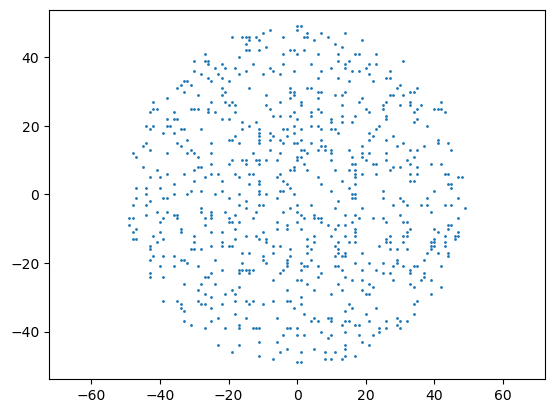

In [15]:
from dispersors import generate_circular_lattice_dispersors

points = generate_circular_lattice_dispersors(50, 0.1)
plt.scatter(points[:, 0], points[:, 1], s=1)
plt.axis('equal')
plt.show()

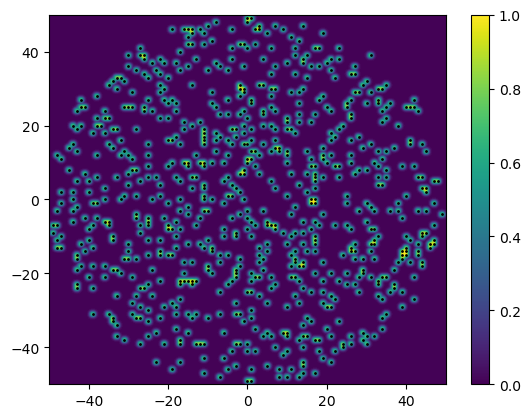

In [24]:
# Generate a mesh

# points =np.array([[0,0]])

N=1000

x = np.linspace(-50, 50, N)
y = np.linspace(-50, 50, N)
X, Y = np.meshgrid(x, y)

# Calculate the potential

def potential(x, y, points, sigma=0.5):
    return 1/(2*np.pi*sigma**2)*np.sum(np.exp(-((x - points[:, 0])**2 + (y - points[:, 1])**2) / (2*sigma**2)))

Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[i, j] = potential(x[i], y[j], points)
        
plt.contourf(X, Y, Z.T, levels=100)
plt.scatter(points[:, 0], points[:, 1], s=1, c='black')
plt.colorbar()
plt.show()


In [25]:
# solve shrodinger equation

potential = Z.T.reshape(N**2)
    

(1000000,)


(-55.0, 55.0, -55.0, 55.0)

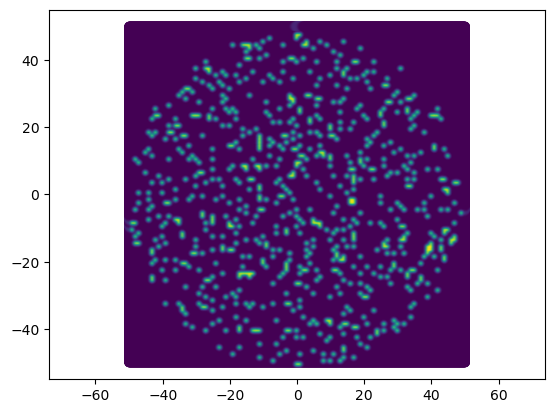

In [29]:
print(potential.shape)

plt.scatter(X, Y, c=potential)
plt.axis('equal')

In [82]:
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2 * sparse.kronsum(D,D)
U = sparse.diags(potential, (0))
H = T+U

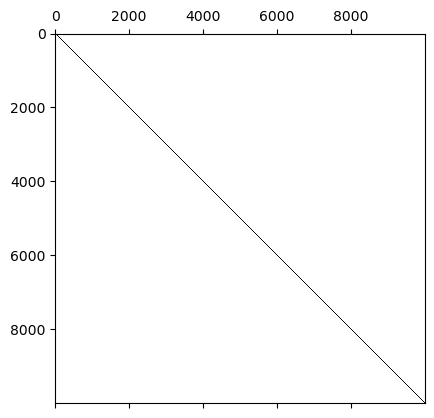

In [81]:
diag = np.ones([100])
diags = np.array([diag,-2*diag,diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), 100, 100)
T= -1/2 * sparse.kronsum(D,D)
plt.spy(T.toarray())

In [65]:
test = T[0:200,0:200].toarray()
print(test.shape)

(200, 200)


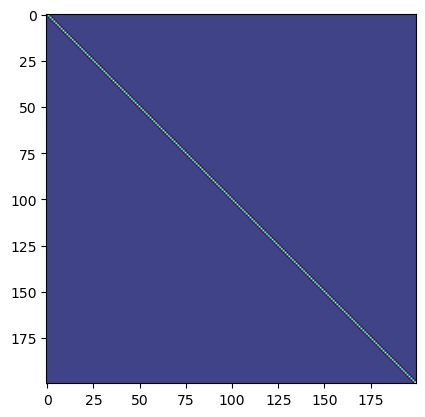

In [67]:
plt.imshow(test)

In [83]:
spectrum, _ = sparse.linalg.eigsh(H, k=100, which='SM')

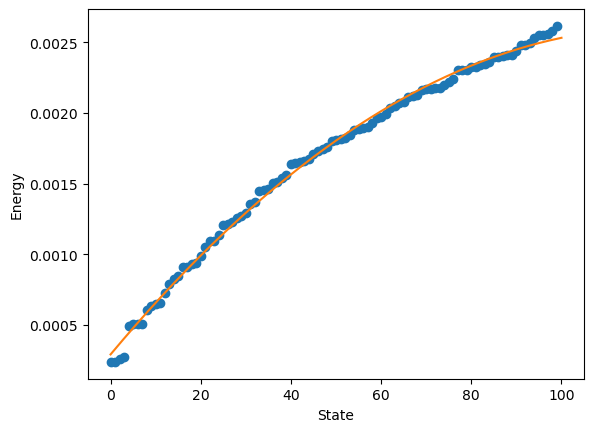

[-1.57026865e-07  3.80882822e-05  2.92600663e-04]


In [87]:
plt.plot(spectrum, 'o')
# fit to a parabola
from scipy.optimize import curve_fit
def parabola(x, a, b, c):
    return a*x**2 + b*x + c

popt, _ = curve_fit(parabola, np.arange(100), spectrum)
x_fit = np.linspace(0, 100, 1000)
plt.plot(x_fit, parabola(x_fit, *popt))
plt.ylabel('Energy')
plt.xlabel('State')
plt.show()
print(popt)